In [1]:
import os
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report




In [2]:
test_dir = "./data/Testing"
train_dir = "./data/Training"

In [3]:
# Image dimensions
IMG_SIZE = 224  # Resize all images to 224x224 pixels

In [4]:
def load_and_preprocess_images(data_path):
    images = []
    labels = []

    class_names = os.listdir(data_path)  # Glioma, Meningioma, etc.
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(data_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 224x224
            img = img / 255.0  # Normalize to [0, 1] range
            images.append(img)
            labels.append(label)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load training and testing data
train_images, train_labels = load_and_preprocess_images(train_dir)
test_images, test_labels = load_and_preprocess_images(test_dir)

In [5]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=4)
test_labels = to_categorical(test_labels, num_classes=4)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

In [7]:
def build_cnn_model():
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Second Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    # Flattening the feature map
    model.add(Flatten())

    # Fully Connected Layer (Dense Layer)
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(4, activation='softmax'))  # 4 classes: Glioma, Meningioma, Pituitary, No Tumor

    return model

# Instantiate the model
cnn_model = build_cnn_model()

C:\Users\Devansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # You can adjust based on resources
    batch_size=32,
    verbose=1
)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 101s 686ms/step - accuracy: 0.7673 - loss: 0.8106 - val_accuracy: 0.2318 - val_loss: 1.9164
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 94s 656ms/step - accuracy: 0.8829 - loss: 0.3299 - val_accuracy: 0.4759 - val_loss: 1.6025
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 92s 644ms/step - accuracy: 0.9269 - loss: 0.1892 - val_accuracy: 0.7323 - val_loss: 0.7830
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 93s 653ms/step - accuracy: 0.9608 - loss: 0.1124 - val_accuracy: 0.8854 - val_loss: 0.3412
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 95s 661ms/step - accuracy: 0.9705 - loss: 0.0863 - val_accuracy: 0.9344 - val_loss: 0.1932
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 92s 643ms/step - accuracy: 0.9812 - loss: 0.0530 - val_accuracy: 0.9475 - val_loss: 0.1647
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 89s 623ms/step - accuracy: 0.9825 - loss: 0.0517 - val_accuracy: 0.9274 - val_loss: 0.2566
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 91s 634ms/step - accuracy: 0.9862 - loss: 

In [10]:
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.9481 - loss: 0.1936
Test Accuracy: 94.81%


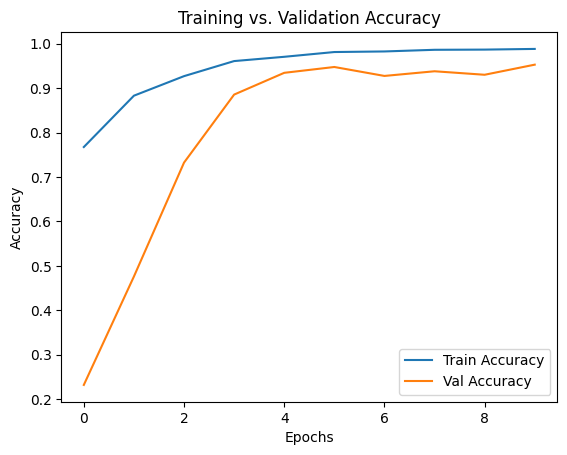

In [11]:

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

In [12]:

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [13]:
def plot_accuracy_and_loss(history):
    plt.figure(figsize=(12, 5))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

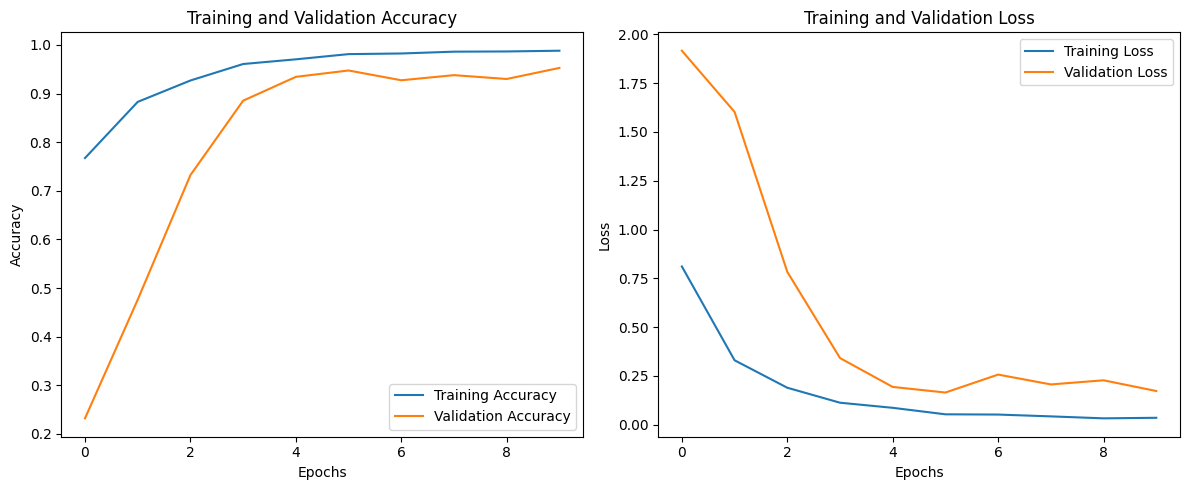

In [14]:
plot_accuracy_and_loss(history)

In [15]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [16]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [17]:
y_pred = cnn_model.predict(test_generator)
y_pred_classes = y_pred.argmax(axis=-1)
y_true = test_generator.classes

C:\Users\Devansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 194ms/step


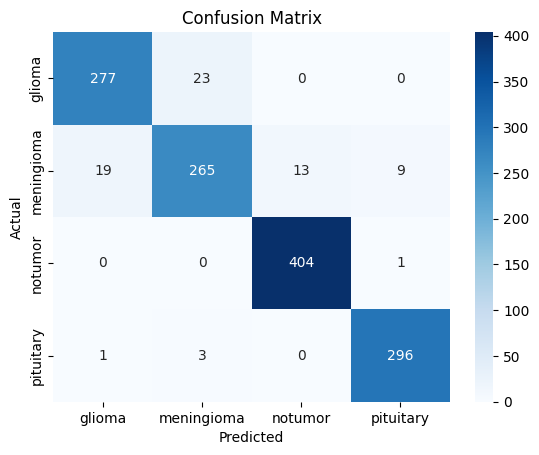

              precision    recall  f1-score   support

      glioma       0.93      0.92      0.93       300
  meningioma       0.91      0.87      0.89       306
     notumor       0.97      1.00      0.98       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.95      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.95      0.95      0.95      1311



In [18]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

C:\Users\Devansh\AppData\Local\Temp\ipykernel_6672\2394786428.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Accuracy', data=accuracy_df, palette='Blues_d')


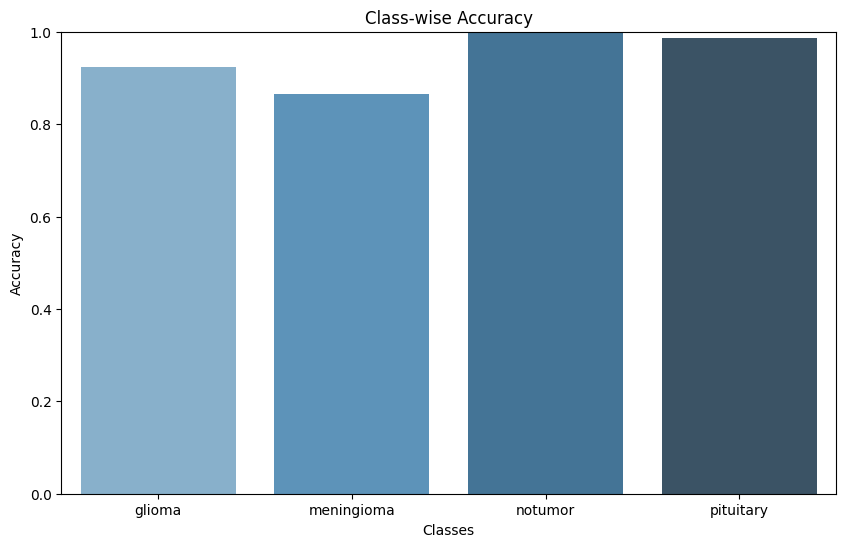

In [19]:
import seaborn as sns

# Create a DataFrame to store class names and accuracy
import pandas as pd
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
class_accuracy = np.diagonal(conf_matrix) / conf_matrix.sum(axis=1)
accuracy_df = pd.DataFrame({
    'Class': class_names,
    'Accuracy': class_accuracy
})

# Plot using Seaborn for better styling
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Accuracy', data=accuracy_df, palette='Blues_d')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.ylim(0, 1)
plt.show()

In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix